### Notebook for generating images for website demo
Note: Make sure folders exist before saving into them!  If they don't exist, create them first before running the image generator code.

In [1]:
# import libraries
import os
import time
import math
import random
import numpy as np
import pandas as pd
import pickle5 as pickle
import matplotlib.pyplot as plt
from pylab import *

import dashboard as dash

# folder to save images in
path = '../website/images/demo_imgs'

In [2]:
# generate dataframe with predictions plus dictionary of defective wafers by lot
data_path = 'demo_data/WM-unlabeled-demo424.pkl'
predictions_path = 'demo_data/demo_results.pkl'

data, lot_count = dash.generate_dashboard_data(data_path=data_path, predictions_path=predictions_path)

data.head()

Dataset shape: (5000, 14)
Number of lots in lot count dictionary: 200


,ID,waferMap,dieSize,lotName,waferIndex,x_,y_,density,is_corrupted,mark,pred_labels,pred_prob,pred2_labels,pred2_prob
0,862,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,...",524,lot1386,1,26,26,0.775148,0,0,8,99.920470,0,0.045491
1,863,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,...",524,lot1386,2,26,26,0.775148,0,0,8,99.960643,1,0.014145
2,864,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1,...",524,lot1386,3,26,26,0.775148,0,0,8,99.964094,1,0.010281
3,865,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2,...",524,lot1386,4,26,26,0.775148,0,0,8,99.788290,0,0.139967
4,866,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1,...",524,lot1386,5,26,26,0.775148,0,0,8,99.827480,0,0.091806


In [3]:
# identify lots with corrupted wafers labeled as random
lots_w_random = data[data.pred_labels==5].groupby('lotName')['lotName'].count()
lotx = {x for x, y in lots_w_random.items() if y > 20}

# remove corrupted wafers
def mark_rand(x):
    if x in lotx:
        return 1
    else:
        return 0

data['rand'] = data.lotName.apply(lambda x: mark_rand(x))
data = data[data.rand == 0].reset_index(drop=True)

# remove corrupted lots from lot_count dictionary
for key in lotx:
    del lot_count[key]
    
print(f'Dataset shape: {data.shape}')
print(f'Number of lots in lot count dictionary: {len(lot_count)}')

# per wafer statistics
pct_none = len(data[data.pred_labels == 8]) / len(data) * 100
print(f'Percent of wafers predicted with no defects: {pct_none:.2f}%')

pct_def = len(data[data.pred_labels != 8]) / len(data) * 100
print(f'Percent of wafers predicted with defects: {pct_def:.2f}%')

# lot statistics
pct_none_lot = len([x for x, y in lot_count.items() if y == 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with no defective wafers: {pct_none_lot:.0f}%')

pct_def_lot = len([x for x, y in lot_count.items() if y > 0]) / len(lot_count) * 100
print(f'Percent of lots predicted with at least one defective wafer: {pct_def_lot:.0f}%')

pct_all_lot = len([x for x, y in lot_count.items() if y == 25]) / len(lot_count) * 100
print(f'Percent of lots predicted to be all defective: {pct_all_lot:.0f}%')

Dataset shape: (4850, 15)
Number of lots in lot count dictionary: 194
Percent of wafers predicted with no defects: 92.14%
Percent of wafers predicted with defects: 7.86%
Percent of lots predicted with no defective wafers: 43%
Percent of lots predicted with at least one defective wafer: 57%
Percent of lots predicted to be all defective: 1%


In [4]:
### uncomment this cell to browse through lots

# from IPython.display import clear_output
# def show_lots(test_lots):
#     for lot in test_lots: 
#         dash.plot_lot(data, lot, resize=False)
#         input('Press enter to see next lot')
#         clear_output(wait=True)
        
# lots = list(lot_count.keys())
# show_lots(lots)

### Generate images of plots for results dashboard

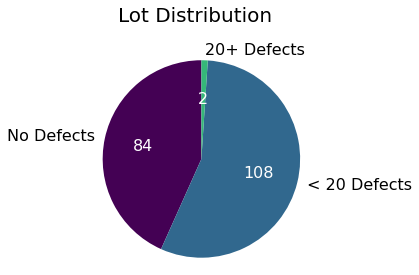

In [5]:
# lot pie chart
dash.visualize_defective_lots(lot_count, save=True, filename=f'{path}/dashboard_plots/pie_chart')

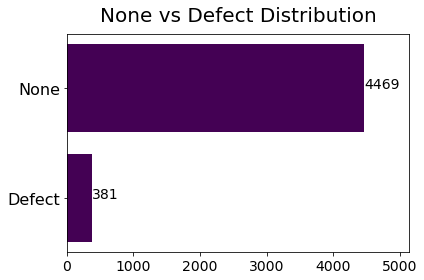

In [6]:
# none vs defect bar chart
dash.defect_distribution(data, mode='detect', color='#440154FF', 
                         save=True, filename=f'{path}/dashboard_plots/none_v_defects')

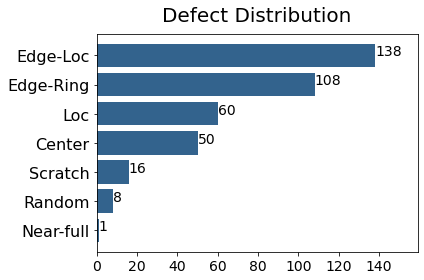

In [7]:
# distribution of defective labels
dash.defect_distribution(data, mode='classify', color='#33638DFF', 
                         save=True, filename=f'{path}/dashboard_plots/defect_distribution')

### Generate images of example lots

#### Sample lot #1: lot1940

lot1940


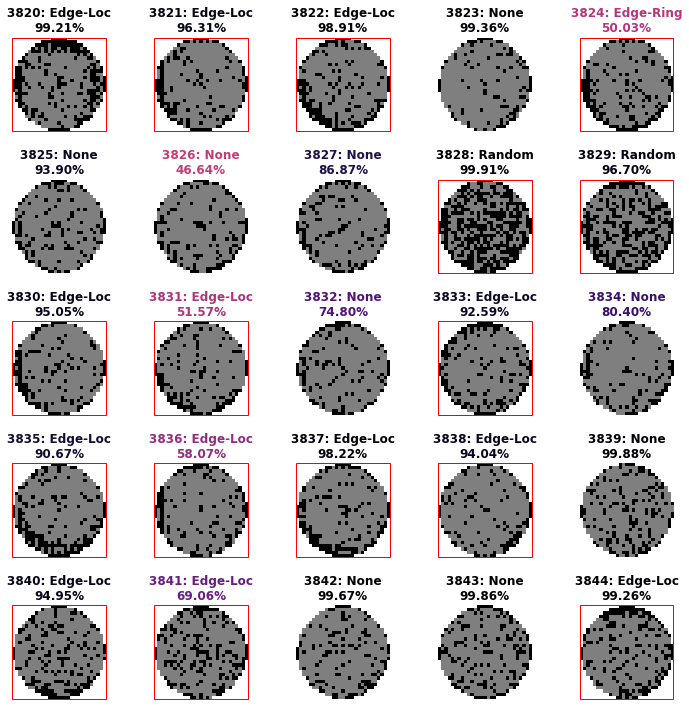

In [8]:
# generate image of example lot
dash.plot_lot(data, 'lot1940', box_color='red', save=True, filename=f'{path}/lot1940/lot1940')

lot1940-0 saved
lot1940-1 saved
lot1940-2 saved
lot1940-3 saved
lot1940-4 saved
lot1940-5 saved
lot1940-6 saved
lot1940-7 saved
lot1940-8 saved
lot1940-9 saved
lot1940-10 saved
lot1940-11 saved
lot1940-12 saved
lot1940-13 saved
lot1940-14 saved
lot1940-15 saved
lot1940-16 saved
lot1940-17 saved
lot1940-18 saved
lot1940-19 saved
lot1940-20 saved
lot1940-21 saved
lot1940-22 saved
lot1940-23 saved
lot1940-24 saved


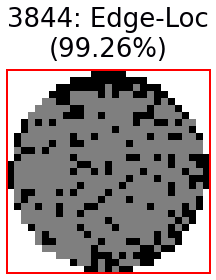

In [9]:
# generate individual images for example lot
dash.plot_lot_individuals(data, 'lot1940', box_color='red', save=True, path=f'{path}/lot1940/individual/')

lot1940-0-highres saved
lot1940-1-highres saved
lot1940-2-highres saved
lot1940-3-highres saved
lot1940-4-highres saved
lot1940-5-highres saved
lot1940-6-highres saved
lot1940-7-highres saved
lot1940-8-highres saved
lot1940-9-highres saved
lot1940-10-highres saved
lot1940-11-highres saved
lot1940-12-highres saved
lot1940-13-highres saved
lot1940-14-highres saved
lot1940-15-highres saved
lot1940-16-highres saved
lot1940-17-highres saved
lot1940-18-highres saved
lot1940-19-highres saved
lot1940-20-highres saved
lot1940-21-highres saved
lot1940-22-highres saved
lot1940-23-highres saved
lot1940-24-highres saved


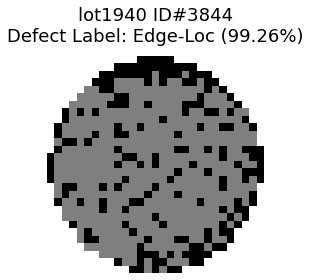

In [10]:
# generate high resolution images for clicking on example lot
dash.plot_lot_high_res(data, 'lot1940', save=True, path=f'{path}/lot1940/high_res/')

#### Sample lot #1: lot8513

lot8513


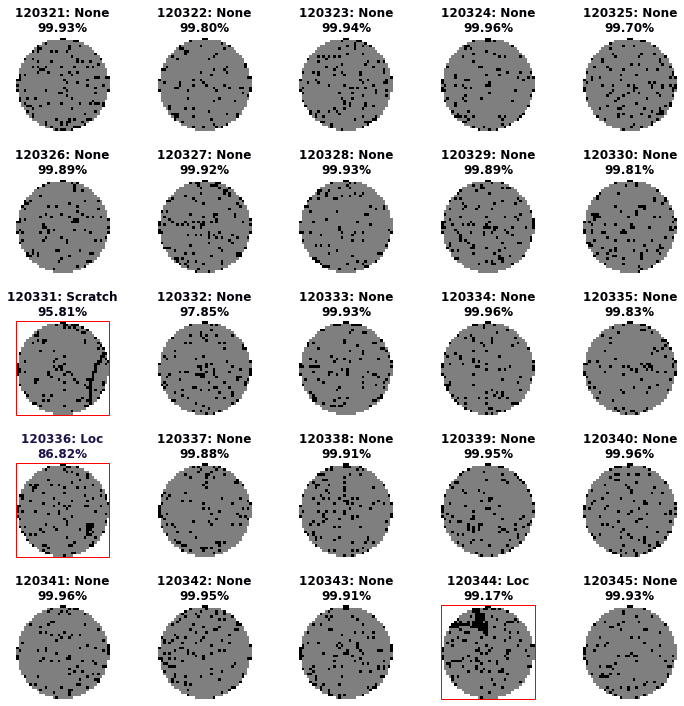

In [11]:
# generate image of example lot
dash.plot_lot(data, 'lot8513', box_color='red', save=True, filename=f'{path}/lot8513/lot8513')

lot8513-0 saved
lot8513-1 saved
lot8513-2 saved
lot8513-3 saved
lot8513-4 saved
lot8513-5 saved
lot8513-6 saved
lot8513-7 saved
lot8513-8 saved
lot8513-9 saved
lot8513-10 saved
lot8513-11 saved
lot8513-12 saved
lot8513-13 saved
lot8513-14 saved
lot8513-15 saved
lot8513-16 saved
lot8513-17 saved
lot8513-18 saved
lot8513-19 saved
lot8513-20 saved
lot8513-21 saved
lot8513-22 saved
lot8513-23 saved
lot8513-24 saved


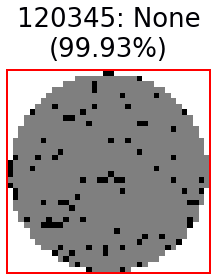

In [12]:
# generate individual images for example lot
dash.plot_lot_individuals(data, 'lot8513', box_color='red', save=True, path=f'{path}/lot8513/individual/')

lot8513-0-highres saved
lot8513-1-highres saved
lot8513-2-highres saved
lot8513-3-highres saved
lot8513-4-highres saved
lot8513-5-highres saved
lot8513-6-highres saved
lot8513-7-highres saved
lot8513-8-highres saved
lot8513-9-highres saved
lot8513-10-highres saved
lot8513-11-highres saved
lot8513-12-highres saved
lot8513-13-highres saved
lot8513-14-highres saved
lot8513-15-highres saved
lot8513-16-highres saved
lot8513-17-highres saved
lot8513-18-highres saved
lot8513-19-highres saved
lot8513-20-highres saved
lot8513-21-highres saved
lot8513-22-highres saved
lot8513-23-highres saved
lot8513-24-highres saved


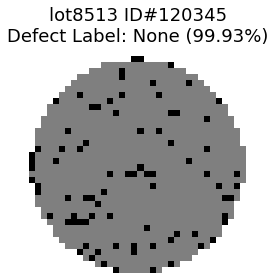

In [13]:
# generate high resolution images for clicking on example lot
dash.plot_lot_high_res(data, 'lot8513', save=True, path=f'{path}/lot8513/high_res/')

### Generate images of examples of defects

#### Loc Examples

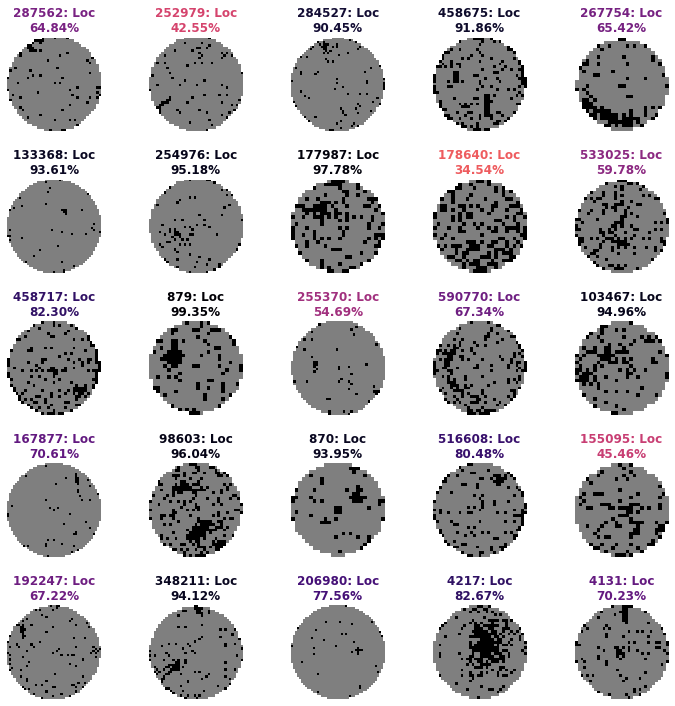

In [14]:
# random samples of loc
from random import sample
defects = [i for i in range(len(data)) if data.iloc[i].pred_labels == 0]
random_n = sample(defects, 25)
dash.plot_list(data, random_n, save=True, filename=f'{path}/defect_loc/loc_examples')

Loc-0 saved
Loc-1 saved
Loc-2 saved
Loc-3 saved
Loc-4 saved
Loc-5 saved
Loc-6 saved
Loc-7 saved
Loc-8 saved
Loc-9 saved
Loc-10 saved
Loc-11 saved
Loc-12 saved
Loc-13 saved
Loc-14 saved
Loc-15 saved
Loc-16 saved
Loc-17 saved
Loc-18 saved
Loc-19 saved
Loc-20 saved
Loc-21 saved
Loc-22 saved
Loc-23 saved
Loc-24 saved


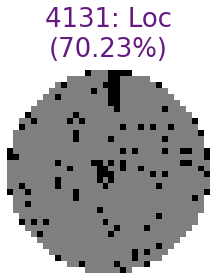

In [15]:
# generate individual loc images
dash.plot_list_individuals(data, random_n, save=True, path=f'{path}/defect_loc/individual/')

Loc-0-highres saved
Loc-1-highres saved
Loc-2-highres saved
Loc-3-highres saved
Loc-4-highres saved
Loc-5-highres saved
Loc-6-highres saved
Loc-7-highres saved
Loc-8-highres saved
Loc-9-highres saved
Loc-10-highres saved
Loc-11-highres saved
Loc-12-highres saved
Loc-13-highres saved
Loc-14-highres saved
Loc-15-highres saved
Loc-16-highres saved
Loc-17-highres saved
Loc-18-highres saved
Loc-19-highres saved
Loc-20-highres saved
Loc-21-highres saved
Loc-22-highres saved
Loc-23-highres saved
Loc-24-highres saved


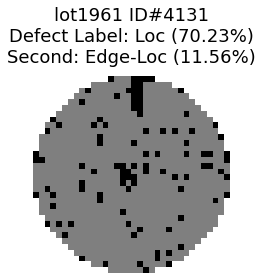

In [16]:
# generate high resolution loc images
dash.plot_list_high_res(data, random_n, save=True, path=f'{path}/defect_loc/high_res/')

#### Edge-Loc Examples

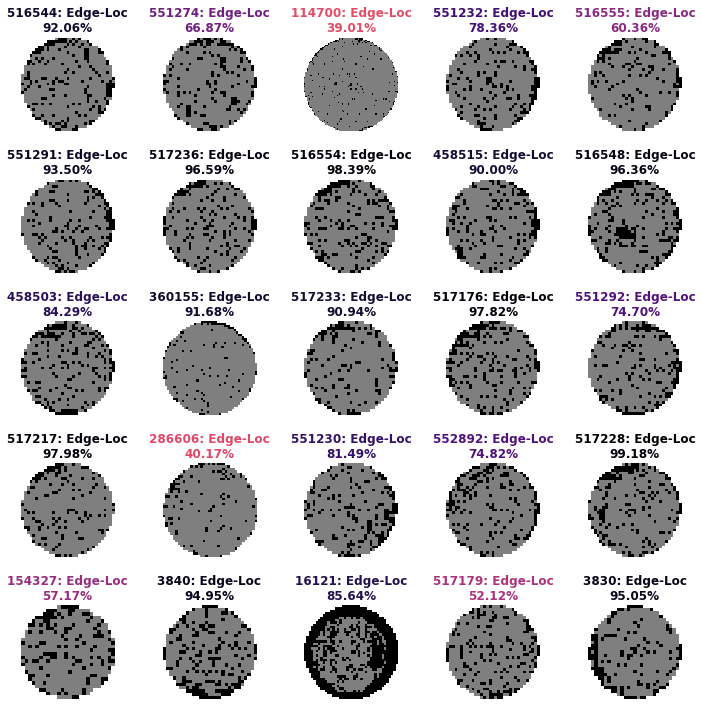

In [17]:
# random samples of edge-loc
from random import sample
defects = [i for i in range(len(data)) if data.iloc[i].pred_labels == 1]
random_n = sample(defects, 25)
dash.plot_list(data, random_n, save=True, filename=f'{path}/defect_edgeloc/edgeloc_examples')

Edge-Loc-0 saved
Edge-Loc-1 saved
Edge-Loc-2 saved
Edge-Loc-3 saved
Edge-Loc-4 saved
Edge-Loc-5 saved
Edge-Loc-6 saved
Edge-Loc-7 saved
Edge-Loc-8 saved
Edge-Loc-9 saved
Edge-Loc-10 saved
Edge-Loc-11 saved
Edge-Loc-12 saved
Edge-Loc-13 saved
Edge-Loc-14 saved
Edge-Loc-15 saved
Edge-Loc-16 saved
Edge-Loc-17 saved
Edge-Loc-18 saved
Edge-Loc-19 saved
Edge-Loc-20 saved
Edge-Loc-21 saved
Edge-Loc-22 saved
Edge-Loc-23 saved
Edge-Loc-24 saved


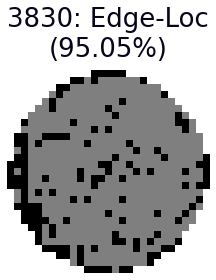

In [18]:
# generate individual loc images
dash.plot_list_individuals(data, random_n, save=True, path=f'{path}/defect_edgeloc/individual/')

Edge-Loc-0-highres saved
Edge-Loc-1-highres saved
Edge-Loc-2-highres saved
Edge-Loc-3-highres saved
Edge-Loc-4-highres saved
Edge-Loc-5-highres saved
Edge-Loc-6-highres saved
Edge-Loc-7-highres saved
Edge-Loc-8-highres saved
Edge-Loc-9-highres saved
Edge-Loc-10-highres saved
Edge-Loc-11-highres saved
Edge-Loc-12-highres saved
Edge-Loc-13-highres saved
Edge-Loc-14-highres saved
Edge-Loc-15-highres saved
Edge-Loc-16-highres saved
Edge-Loc-17-highres saved
Edge-Loc-18-highres saved
Edge-Loc-19-highres saved
Edge-Loc-20-highres saved
Edge-Loc-21-highres saved
Edge-Loc-22-highres saved
Edge-Loc-23-highres saved
Edge-Loc-24-highres saved


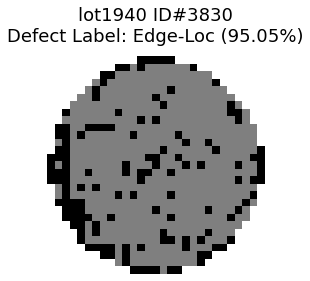

In [19]:
# generate high resolution loc images
dash.plot_list_high_res(data, random_n, save=True, path=f'{path}/defect_edgeloc/high_res/')

#### Scratch Examples

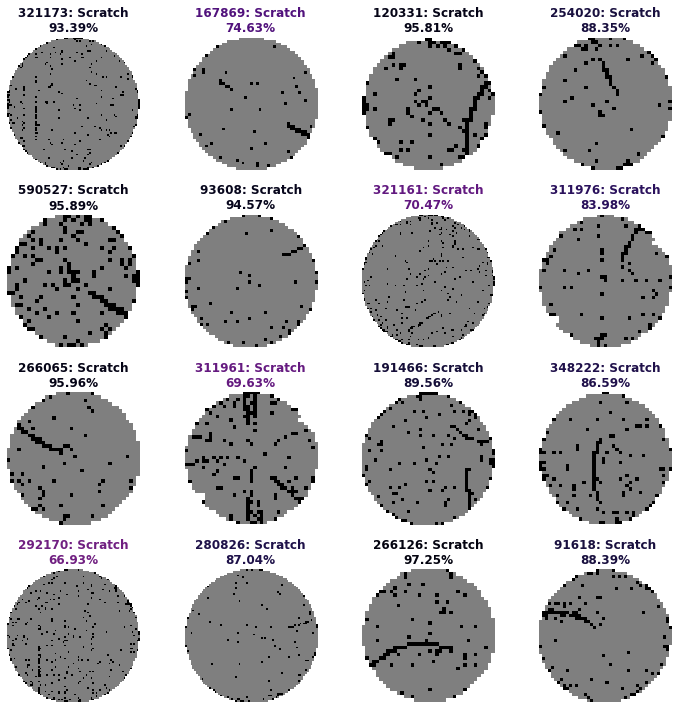

In [20]:
# random samples of scratch
from random import sample
defects = [i for i in range(len(data)) if data.iloc[i].pred_labels == 4]
random_n = sample(defects, 16)
dash.plot_list(data, random_n, save=True, filename=f'{path}/defect_scratch/scratch_examples')

Scratch-0 saved
Scratch-1 saved
Scratch-2 saved
Scratch-3 saved
Scratch-4 saved
Scratch-5 saved
Scratch-6 saved
Scratch-7 saved
Scratch-8 saved
Scratch-9 saved
Scratch-10 saved
Scratch-11 saved
Scratch-12 saved
Scratch-13 saved
Scratch-14 saved
Scratch-15 saved


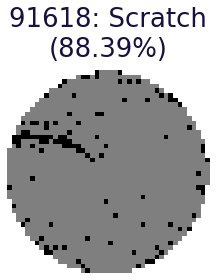

In [21]:
# generate individual loc images
dash.plot_list_individuals(data, random_n, save=True, path=f'{path}/defect_scratch/individual/')

Scratch-0-highres saved
Scratch-1-highres saved
Scratch-2-highres saved
Scratch-3-highres saved
Scratch-4-highres saved
Scratch-5-highres saved
Scratch-6-highres saved
Scratch-7-highres saved
Scratch-8-highres saved
Scratch-9-highres saved
Scratch-10-highres saved
Scratch-11-highres saved
Scratch-12-highres saved
Scratch-13-highres saved
Scratch-14-highres saved
Scratch-15-highres saved


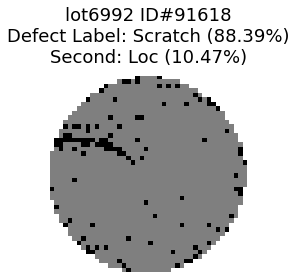

In [22]:
# generate high resolution loc images
dash.plot_list_high_res(data, random_n, save=True, path=f'{path}/defect_scratch/high_res/')